In [3]:
# library import
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, ward, linkage
import numpy as np
import pandas as pd

### 응용! 적용!

#### 1.데이터 불러오기

In [6]:
custom_data = pd.read_csv('221027_shopping-data.csv')
print(custom_data.shape)
custom_data.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 2.원하는 feature만 가져오기

In [13]:
data = custom_data.iloc[:, 3:5].values
data


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### 3.Dendrogram 방법1

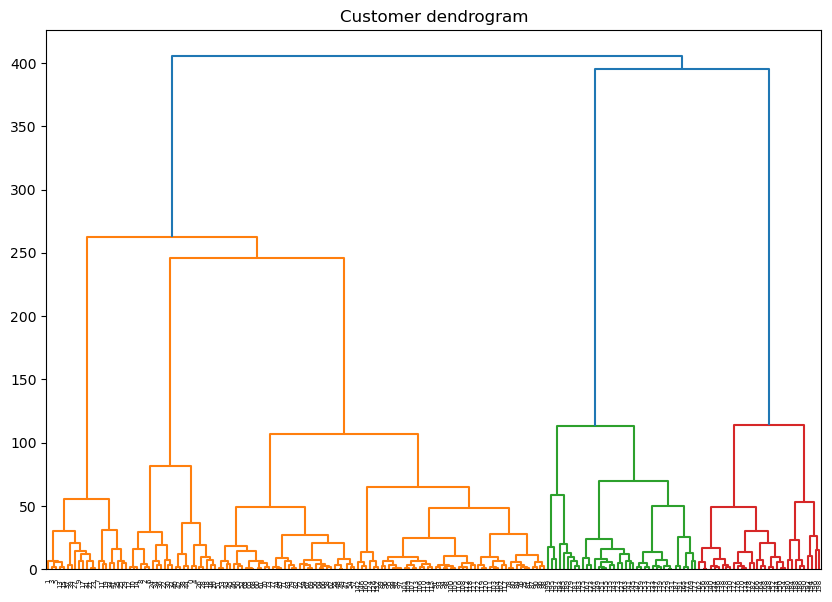

In [15]:
plt.figure(figsize=(10,7))
plt.title("Customer dendrogram")
dend = dendrogram(linkage(data, method='ward'))

# df = linkage(data, method='ward')
# dr1 = dendrogram(df)
# plt.title("Customer dendrogram")


### 4.Dendrogram 방법2

Text(0.5, 1.0, 'Customer dendrogram')

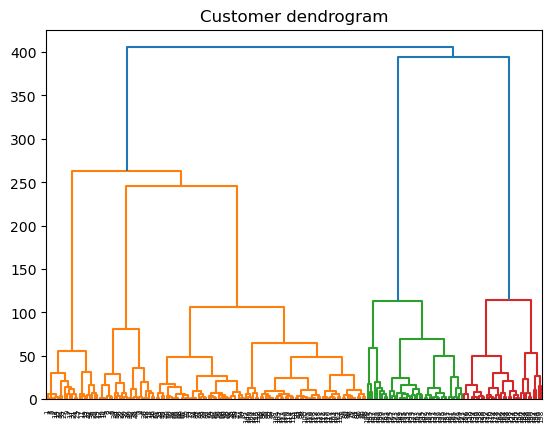

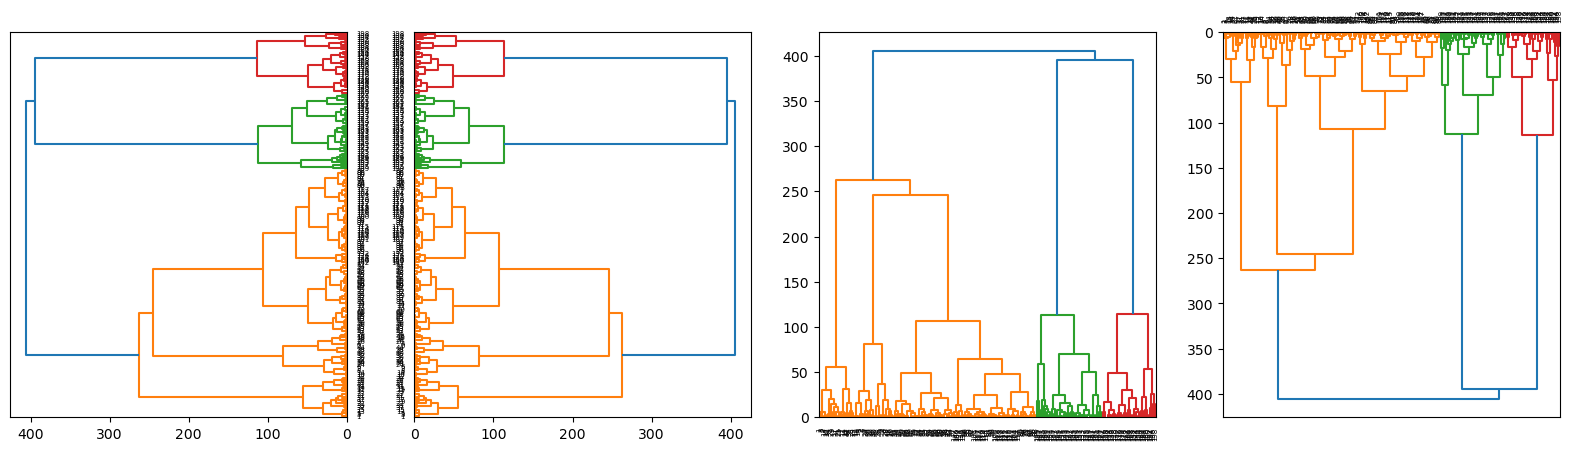

In [22]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,4,1)
d1 = dendrogram(linkage(data, method='ward'), orientation='left')

ax2 = fig.add_subplot(1,4,2)
d2 = dendrogram(linkage(data, method='ward'), orientation='right')

ax3 = fig.add_subplot(1,4,3)
d3 = dendrogram(linkage(data, method='ward'), orientation='top')

ax4 = fig.add_subplot(1,4,4)
d4 = dendrogram(linkage(data, method='ward'), orientation='bottom')


In [24]:
from sklearn.cluster import AgglomerativeClustering # 계층적 군집분석
from scipy.cluster.hierarchy import dendrogram, linkage # 시각화 특화

- sklearn의 경우 덴드로그램을 통해서 시각화를 할 수 없다.
- scipy보다 시각화가 뛰어나지 않음``
- 군집이 어떤 과정으로 생성되었는지 시각화하고 싶으면 덴드로그램을 사용한다. 

In [25]:
cluster = AgglomerativeClustering(n_clusters = 5, linkage='ward')
cluster.fit_predict(data)

# 몇 개의 class로 되어 있는지 알 수 있음

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

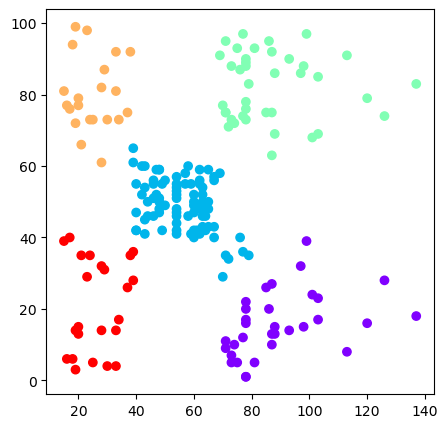

In [31]:
plt.figure(figsize=(5,5))
plt.scatter(data[:, 0], data[: ,1],
            c = cluster.labels_ , # 각 데이터에 대한 클러스트 결과물
            cmap = 'rainbow' # 색 지정
            )

# sklearn은 어떤 feature끼리 묶었는지 알 수 없다.

## Wine data

In [37]:
from sklearn.metrics import silhouette_score

# 경고창 피하는 코드
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

#Korean in plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False


In [33]:
wine_pf = pd.read_csv('221027_wine_data.csv')
wine_pf.head()

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0


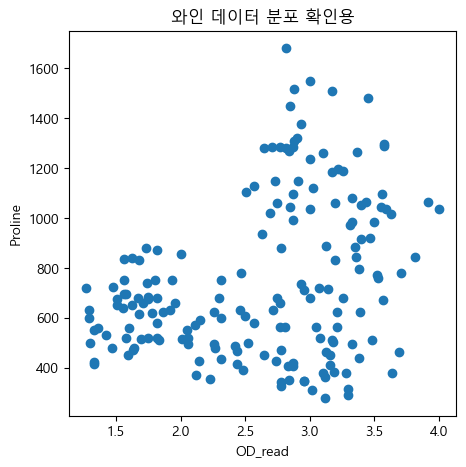

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(wine_pf.values[:, 0], wine_pf.values[:, 1])
plt.title("와인 데이터 분포 확인용")
plt.xlabel("OD_read")
plt.ylabel("Proline")
plt.show()

### K-Means

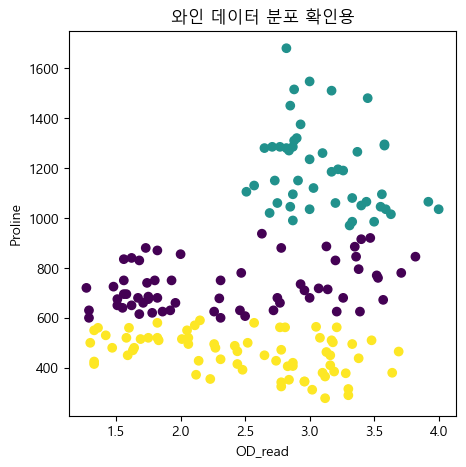

In [40]:
km = KMeans(3)
km_cluster = km.fit_predict(wine_pf)

plt.figure(figsize=(5,5))
plt.scatter(wine_pf.values[:, 0], wine_pf.values[:, 1], c=km_cluster)
# 마커의 색상을 변경하고 싶다면 c 매개변수를 사용하고, 색상을 문자열(혹은 헥스코드)로 전달
plt.title("와인 데이터 분포 확인용")
plt.xlabel("OD_read")
plt.ylabel("Proline")
plt.show()

In [41]:
km_cluster

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

### 계층적 군집분석, 병합분석

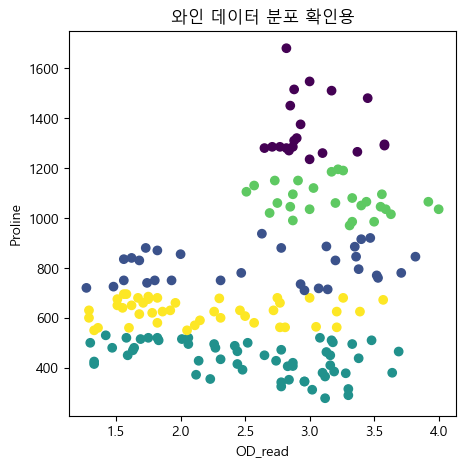

In [43]:
a = AgglomerativeClustering(3, linkage='ward')
a_cluster = cluster.fit_predict(wine_pf)

plt.figure(figsize=(5,5))
plt.scatter(wine_pf.values[:, 0], wine_pf.values[:, 1], c=a_cluster)
# 마커의 색상을 변경하고 싶다면 c 매개변수를 사용하고, 색상을 문자열(혹은 헥스코드)로 전달
plt.title("와인 데이터 분포 확인용")
plt.xlabel("OD_read")
plt.ylabel("Proline")
plt.show()

![image](https://user-images.githubusercontent.com/87592790/198211781-6bc5e355-58c2-4c5c-aaca-05711b943888.png)


뭐가 더 잘 clustering 했을까?
### 실루엣 지수

In [ ]:
print(f"""
실루엣 지수 비교하기
K-Means : {silhouette_score(wine_pf, km_cluster)}
AGG : {silhouette_score(wine_pf, a_cluster)}
""")